In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [39]:
actions = pd.read_csv("../data/processed_balabit_data.csv")
# actions = pd.read_csv("../../data/data.csv")
actions.head()

,traveled_distance_pixel,elapsed_time,straightness,num_points,sum_of_angles,mean_curv,sd_curv,max_curv,min_curv,mean_omega,...,action_3,action_4,direction_1,direction_2,direction_3,direction_4,direction_5,direction_6,direction_7,user
0,2596.537181,9.329,0.198032,82,56.525861,-0.085272,0.527422,1.091459,-3.141593,15.669106,...,0,0,0,0,1,0,0,0,0,12
1,179.260212,1.919,0.959645,14,11.255258,-0.235679,0.916836,0.314159,-3.141593,-10.058717,...,0,1,0,1,0,0,0,0,0,12
2,887.903498,2.137,0.979540,21,-14.268377,-0.078308,0.112436,0.261799,-1.570796,-5.221251,...,0,0,0,0,0,0,0,0,1,12
3,75.035669,1.358,0.999613,7,-0.071307,-0.000650,0.002580,0.001828,-0.005080,0.052710,...,0,1,0,0,0,0,0,0,1,12
4,1078.673940,3.541,0.949591,27,-24.025555,-0.040986,0.174415,0.249828,-0.628390,4.743248,...,1,0,0,0,0,1,0,0,0,12


In [40]:
# let's include only "action_3" type actions
actions = actions[actions["action_3"]==1]

In [41]:
actions = actions[(actions["user"] == 7) | (actions["user"] == 9) | (actions["user"] == 12) | (actions["user"] == 29)]
actions.reset_index(drop=True, inplace=True)

In [42]:
scaler = StandardScaler()

In [43]:
X = actions.drop("user", axis=1)

In [44]:
X = scaler.fit_transform(actions)

In [45]:
# check the elbow plot to see if a suggested number of clusters comes out
clusters = []

for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

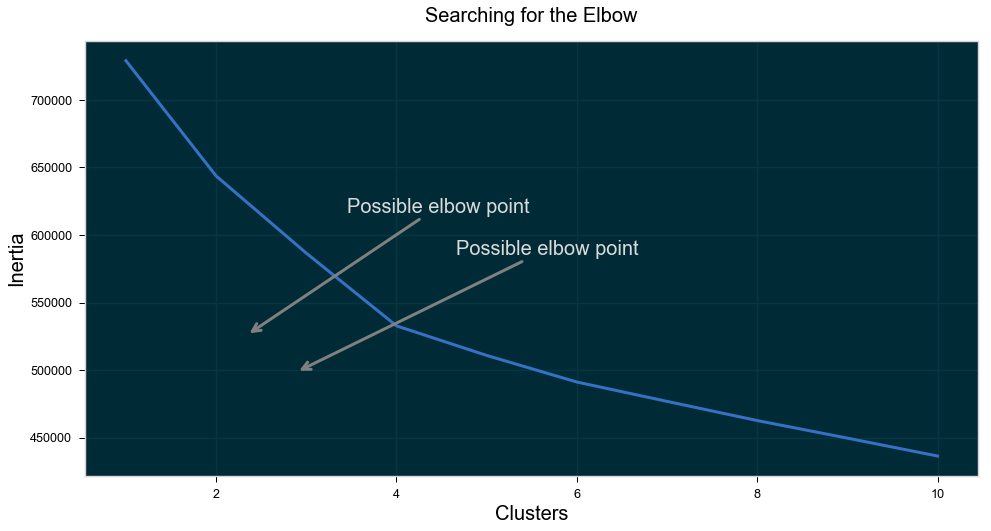

In [46]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax, lw=3)
ax.set_title("Searching for the Elbow", color="black", size=20, y=1.03)
ax.set_xlabel("Clusters", color="black", size=20)
ax.set_ylabel("Inertia", color="black", size=20)
ax.tick_params(colors="black")

ax.annotate("Possible elbow point",
            xy=(0.25, 0.37),
            xytext=(0.35, 0.6),
            xycoords="figure fraction",
            textcoords="figure fraction",
            size=20,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',
                            color='grey',
                            lw=3))

ax.annotate("Possible elbow point",
            xy=(0.3, 0.3),
            xytext=(0.46, 0.52),
            xycoords="figure fraction",
            textcoords="figure fraction",
            size=20,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',
                            color='grey',
                            lw=3))

plt.show()

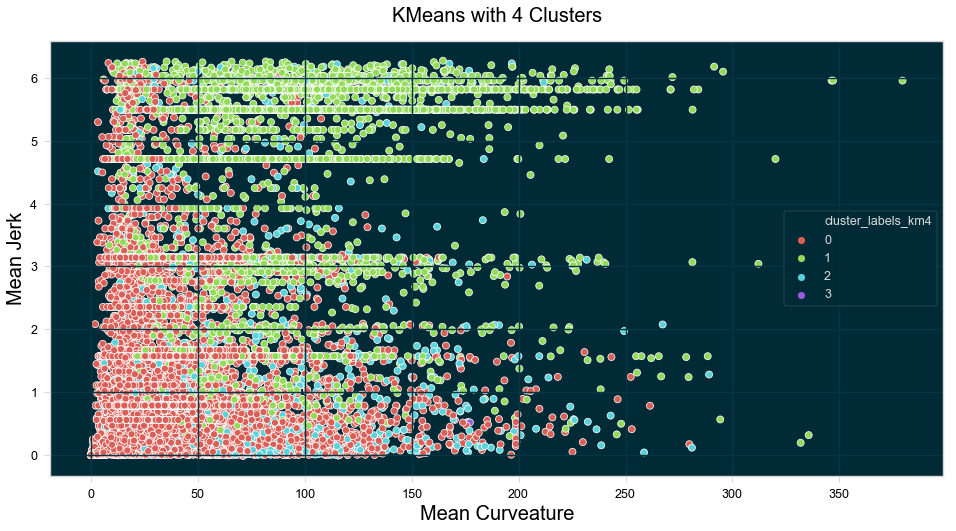

In [57]:
km4 = KMeans(n_clusters=4).fit(X)
actions["cluster_labels_km4"] = km4.labels_

plt.figure(figsize=(16, 8))
sns.scatterplot(actions["sd_omega"], actions["max_curv"],
                hue=actions["cluster_labels_km4"],
                palette=sns.color_palette('hls', 4))
plt.title("KMeans with 4 Clusters", color="black", size=20, y=1.03)
plt.xlabel("Mean Curveature", color="black", size=20)
plt.ylabel("Mean Jerk", color="black", size=20)
plt.xticks(color="black")
plt.yticks(color="black")

plt.show()

In [50]:
actions["cluster_labels_km4"].value_counts()

1    10737
2     4235
0     1227
3        1
Name: cluster_labels_km4, dtype: int64